## 透视变换
给出四组点，将一个矩形变换为另一个矩形，求变换矩阵。

In [9]:
import numpy as np

def warpPerspectiveMatrix(src, dst):
    assert src.shape[0] == dst.shape[0] and src.shape[0] >= 4 # 4 points needed

    size = src.shape[0]
    new_size = 2*size
    a = np.zeros((new_size, 8))
    b = np.zeros((new_size, 1))

    for i in range(0, new_size, 2):
        a_i = src[i//2]
        b_i = dst[i//2]

        a[i] = [a_i[0], a_i[1], 1, 0, 0, 0, -a_i[0]*b_i[0], -a_i[1]*b_i[0]]
        a[i+1] = [0, 0, 0, a_i[0], a_i[1], 1, -a_i[0]*b_i[1], -a_i[1]*b_i[1]]
        b[i] = b_i[0]
        b[i+1] = b_i[1]
    
    a = np.matrix(a)

    warpMatrix = a.I * b

    warpMatrix = np.array(warpMatrix).T[0]
    # add 1 to the end of the matrix
    warpMatrix = np.append(warpMatrix, [1])
    warpMatrix = warpMatrix.reshape((3,3))
    return warpMatrix

In [11]:
src = [[10.0, 457.0], [395.0, 291.0], [624.0, 291.0], [1000.0, 457.0]]
src = np.array(src)

dst = [[46.0, 920.0], [46.0, 100.0], [600.0, 100.0], [600.0, 920.0]]
dst = np.array(dst)

print('warp matrix:')
warpPerspectiveMatrix(src, dst)

warp matrix:


array([[-5.01338334e-01, -1.35357643e+00,  5.82386716e+02],
       [-9.65116875e-16, -4.84035391e+00,  1.38781980e+03],
       [ 0.00000000e+00, -4.14856327e-03,  1.00000000e+00]])

(960, 540, 3)
warp matrix:
[[ 8.92263779e-01  3.76733596e-01 -2.41585375e+02]
 [-4.08140258e-01  9.44205073e-01 -5.80899328e+01]
 [-8.53836442e-05  5.16464182e-05  1.00000000e+00]]


Text(0.5, 1.0, 'Warped')

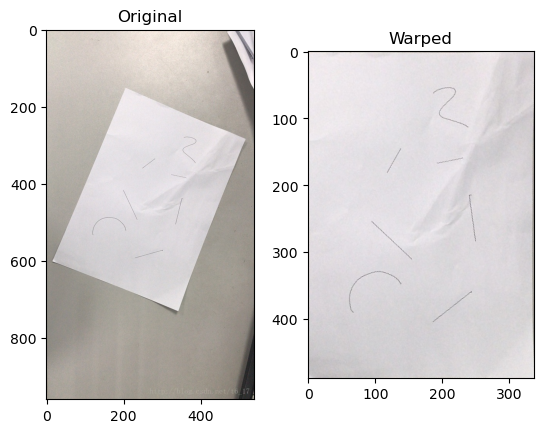

In [14]:
# implament warpPerspective using cv2.warpPerspective

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./photo1.jpg')
img_copy = img.copy()

src = np.float32([[207, 151], [517, 285], [17, 601], [343, 731]])
dst = np.float32([[0, 0], [337, 0], [0, 488], [337, 488]])
print(img.shape)

warp_matrix = cv2.getPerspectiveTransform(src, dst)
print('warp matrix:')
print(warp_matrix)

img_warped = cv2.warpPerspective(img_copy, warp_matrix, (337, 488))

plt.subplot(121) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_warped, cv2.COLOR_BGR2RGB))
plt.title('Warped')


### 找到关键点

使用cv2.approxPolyDP()函数找到四个关键点

函数原形：
cv2.approxPolyDP(curve, epsilon, closed) -> approxCurve

参数：
curve: 图像轮廓点集，一般由轮廓检测得到
epsilon:原始曲线与近似曲线的最大距离，参数越小，两直线越接近
closed: 得到的近似曲线是否封闭，一般为True

返回值：
approxCurve: 返回的拟合后的多边形顶点集。

[[[207 151]]

 [[ 16 603]]

 [[344 732]]

 [[518 283]]]


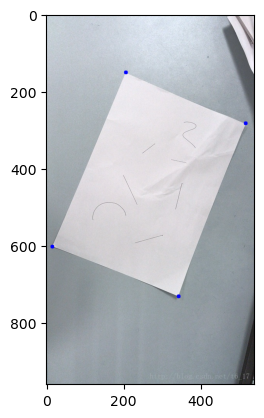

In [26]:
img = cv2.imread('./photo1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
dilated = cv2.dilate(blurred, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
edged = cv2.Canny(dilated, 30, 120, 3)

# find contours
# find the outer contours and only store the key points
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0]
docCnt = None

if len(cnts) > 0:
    # sort the contours according to their area
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    for c in cnts:
        peri = cv2.arcLength(c, True) # calculate the perimeter of the contour
        approx = cv2.approxPolyDP(c, 0.02 * peri, True) # approximate the contour

        if len(approx) == 4:
            docCnt = approx
            break
        
# draw the contour
for point in docCnt:
    cv2.circle(img, tuple(point[0]), 5, (0, 0, 255), -1)

plt.imshow(img)